In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
df = pd.read_csv('winequality-red.csv')

In [3]:
# explopratory data analysis
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nValores nulos por columna:")
print(df.isnull().sum())


Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

In [4]:
# preprocessing - convert quality to binary classification if quiality > 7 then 1 else 0
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [5]:
# set X and y
X = df.drop('quality', axis=1)
y = df['quality']

In [6]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# create and train the model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# predict on the test set
y_pred = rf_model.predict(X_test)

In [9]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Quality', 'High Quality']))

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

 Low Quality       0.92      0.99      0.95       273
High Quality       0.89      0.51      0.65        47

    accuracy                           0.92       320
   macro avg       0.91      0.75      0.80       320
weighted avg       0.92      0.92      0.91       320



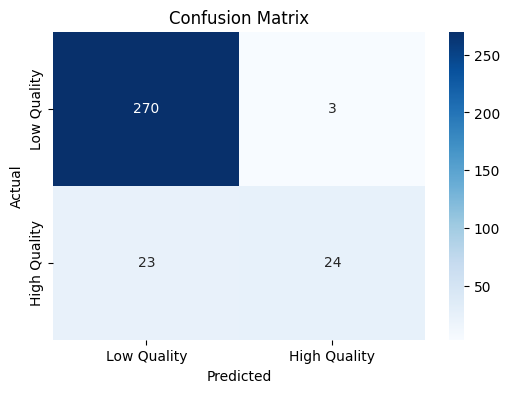

In [10]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Quality', 'High Quality'], yticklabels=['Low Quality', 'High Quality'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# importance of features
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                 Feature  Importance
10               alcohol    0.220177
9              sulphates    0.139000
1       volatile acidity    0.112936
2            citric acid    0.091127
6   total sulfur dioxide    0.079334
7                density    0.078586
4              chlorides    0.064416
0          fixed acidity    0.057521
8                     pH    0.054051
3         residual sugar    0.051910
5    free sulfur dioxide    0.050941


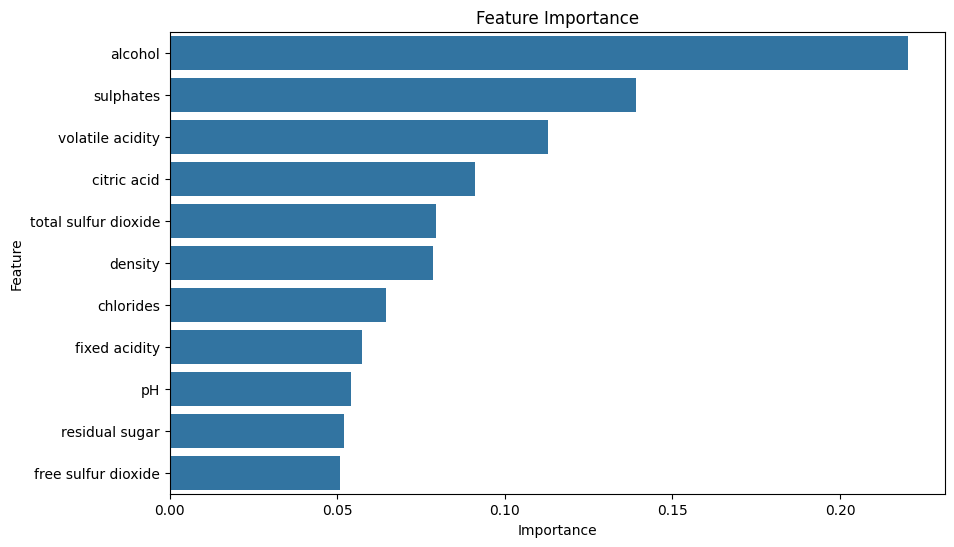

In [12]:
# vizualization of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
# hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("\nBest parameters from Grid Search:")
print(grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits



Best parameters from Grid Search:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [19]:
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'  # Ajusta la ruta
# visualize one of the trees in the random forest
tree = rf_model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Low Quality', 'High Quality'],  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("wine_tree", format="png", view=True)

'wine_tree.png'